In [42]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import os

In [43]:
EEG_PATH = "/srv/eeg_reconstruction/shared/biosemi-dataset/eeg2/preprocessed_eeg"

def getSubChannels(subject = "sub-01", split="test"):
    fpath = os.path.join(EEG_PATH, subject, f"preprocessed_eeg_{split}.npy")
    data = np.load(fpath, allow_pickle=True)
    ch_names = data['ch_names']
    return ch_names


def getSubEeg(subject = "sub-01", split="test"):
    print("Getting eeg data for", subject)
    fpath = os.path.join(EEG_PATH, subject, f"preprocessed_eeg_{split}.npy")
    # load EEGs
    data = np.load(fpath, allow_pickle=True)
    preprocessed_eeg_data = data['preprocessed_eeg_data']
    return np.array(preprocessed_eeg_data)

subjects = os.listdir(EEG_PATH)
eegData = np.array([getSubEeg(sub, "training") for sub in subjects])

channels = getSubChannels(subjects[0], "training")

Getting eeg data for sub-05
Getting eeg data for sub-06
Getting eeg data for sub-02
Getting eeg data for sub-03
Getting eeg data for sub-07
Getting eeg data for sub-04
Getting eeg data for sub-01
Getting eeg data for sub-08


In [44]:
# P1 ERP component, should have positive polarity
time_win = (.080, .140)
electrodes = ('O1', 'O2', 'PO7', 'PO8', 'Pz', 'P3', 'P4')
roi = [channels.index(e) for e in electrodes]

In [45]:
eegData.shape
# participants, classes, repetitions, channels, time steps

(8, 768, 4, 64, 308)

## Inter-subject t test

In [57]:
# Return the diff of mean of responses to two different image conditions
def getSubAvgDiff(eeg, trials, image1Index, image2Index):
    epochs_data1 = eeg[image1Index] # first image
    evoked_data1 = np.mean(epochs_data1[:trials], axis=0) # average across trials

    epochs_data2 = eeg[image2Index] # second image
    evoked_data2 = np.mean(epochs_data2[:trials], axis=0)

    diff_waves = evoked_data1 - evoked_data2
    return diff_waves


In [58]:
# randomly sample 1000 image pairs

import random

numClasses = len(eegData[0])
image_pairs = []

while len(image_pairs) < 1000:
    pair = random.sample(range(numClasses), 2)
    image_pairs.append(pair)

print(image_pairs)

[[528, 412], [29, 726], [263, 236], [93, 98], [756, 529], [319, 394], [550, 558], [287, 267], [679, 86], [81, 715], [714, 65], [726, 459], [241, 714], [446, 281], [531, 311], [19, 63], [508, 584], [266, 481], [41, 336], [515, 703], [540, 438], [314, 332], [190, 174], [45, 373], [328, 427], [557, 267], [322, 591], [241, 473], [673, 441], [168, 519], [199, 646], [453, 548], [553, 173], [633, 740], [533, 110], [578, 494], [581, 741], [644, 634], [58, 318], [204, 252], [332, 579], [511, 397], [378, 389], [616, 141], [348, 290], [650, 342], [170, 459], [575, 322], [289, 699], [519, 345], [622, 614], [552, 466], [318, 487], [738, 368], [90, 152], [25, 74], [237, 428], [569, 479], [396, 674], [484, 565], [345, 651], [46, 333], [605, 29], [686, 700], [48, 20], [395, 140], [564, 136], [369, 256], [652, 216], [695, 256], [278, 82], [721, 332], [487, 444], [357, 552], [475, 675], [186, 593], [299, 130], [723, 738], [23, 39], [274, 419], [762, 344], [613, 384], [658, 571], [76, 572], [305, 249], [

In [59]:
EEG_PATH = "/srv/eeg_reconstruction/shared/biosemi-dataset/eeg2"

fpath = os.path.join(EEG_PATH, "shared1000_indices.npy")
map_data = np.load(fpath, allow_pickle=True)

In [60]:
print(len(map_data))

1000


In [61]:
subjectCount = len(eegData)

tvals = []
pvals = []

for pair in image_pairs:
    differences = np.array([getSubAvgDiff(eegData[i], 4, pair[0], pair[1]) for i in range(subjectCount)])
    #print(differences.shape) #(10, 63, 250)
    y = differences[:, roi, int(time_win[0]*250) : int(time_win[1]*250)]
    y = np.mean(y, axis=2)
    #print(y.shape) #(10, 7)
    t, pval = stats.ttest_1samp(y, 0)

    tvals.append(round(t[0], 2))
    pvals.append(round(pval[0], 4))

    if (pval[0] > 0.99):
        print('IMAGE IDS WITH P VAL: ' + str(pval[0]))
        print(map_data[pair[0]])
        print(map_data[pair[1]])


IMAGE IDS WITH P VAL: 0.991666597496282
336374
113449
IMAGE IDS WITH P VAL: 0.9978275915433565
161354
185888
IMAGE IDS WITH P VAL: 0.9940780723235971
385864
371353
IMAGE IDS WITH P VAL: 0.9969425660601509
81365
450914
IMAGE IDS WITH P VAL: 0.9907879091791731
333615
338987
IMAGE IDS WITH P VAL: 0.9961523660758191
43815
280484
IMAGE IDS WITH P VAL: 0.9952037059511243
18367
335063
IMAGE IDS WITH P VAL: 0.9993540167643403
397192
563961


In [62]:
pvals

[0.9388,
 0.2764,
 0.1054,
 0.0082,
 0.3668,
 0.0132,
 0.9575,
 0.8167,
 0.4449,
 0.5489,
 0.3538,
 0.0241,
 0.692,
 0.9042,
 0.3874,
 0.2345,
 0.5185,
 0.6793,
 0.1727,
 0.5516,
 0.5317,
 0.5887,
 0.562,
 0.4472,
 0.53,
 0.4969,
 0.5877,
 0.2913,
 0.7342,
 0.3766,
 0.8649,
 0.5198,
 0.7685,
 0.3651,
 0.2166,
 0.6663,
 0.1634,
 0.5386,
 0.7617,
 0.0133,
 0.3204,
 0.6187,
 0.3981,
 0.396,
 0.9684,
 0.5496,
 0.2295,
 0.7486,
 0.9654,
 0.6887,
 0.7723,
 0.4342,
 0.2592,
 0.3694,
 0.0775,
 0.8093,
 0.6612,
 0.1221,
 0.9031,
 0.9861,
 0.9917,
 0.8693,
 0.3871,
 0.5924,
 0.7039,
 0.8578,
 0.3678,
 0.4605,
 0.6666,
 0.6925,
 0.6639,
 0.2841,
 0.2253,
 0.0836,
 0.5248,
 0.9819,
 0.8744,
 0.03,
 0.3004,
 0.0019,
 0.2553,
 0.4803,
 0.7845,
 0.7251,
 0.0468,
 0.2298,
 0.4318,
 0.0638,
 0.1286,
 0.6026,
 0.8161,
 0.4385,
 0.3426,
 0.2022,
 0.7034,
 0.8997,
 0.9576,
 0.8711,
 0.3495,
 0.3619,
 0.3042,
 0.4835,
 0.5631,
 0.3019,
 0.1263,
 0.3305,
 0.2713,
 0.4305,
 0.08,
 0.7301,
 0.5358,
 0.7189,
 

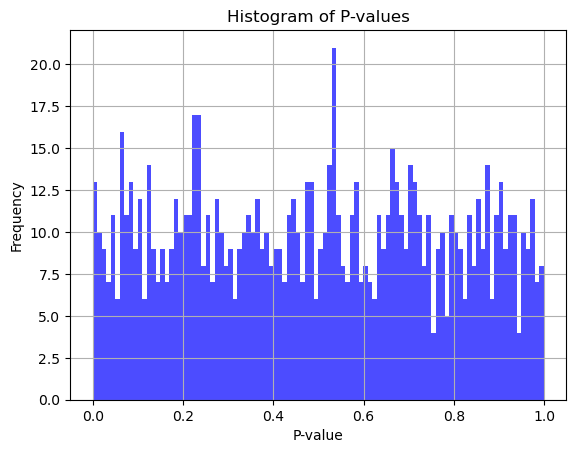

In [63]:
plt.hist(pvals, bins=100, color='blue', alpha=0.7)
plt.title('Histogram of P-values')
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [53]:
EEG_PATH = "/srv/eeg_reconstruction/shared/biosemi-dataset/eeg2"

fpath = os.path.join(EEG_PATH, "shared1000_indices.npy")
map_data = np.load(fpath, allow_pickle=True)

In [54]:
map_data

array([262145, 262239, 262414, 524646, 262690,    584,    605,    625,
          650,   1308, 263599, 525790, 525932, 264244, 264396,   2270,
         2372, 264735, 526968, 526980, 274108, 265023, 265150, 265453,
       527618,   3521, 265745, 558788, 393907,   4442, 266622,   5028,
       267338,   5277, 267647, 267699,   5684, 312536, 268008, 268114,
       268418, 268659,   6765,   7048, 531392, 531515, 531828,  11299,
       219750,   7932,   8027,   8053, 270278, 532753, 533231,   8998,
         1625, 534259,  10046,  10710, 272901,  10903, 273120, 273138,
       273147, 273250,  11358, 535871,  11856, 536786, 536884, 274978,
       537393, 275663, 399878, 275902, 275938,  13969, 276664, 538822,
       539340, 539395, 277524, 570543, 539705, 539879, 300383, 540538,
        16314, 278555, 540735, 278714, 541077, 278962,  16898, 541258,
       279197, 541472, 271183, 541856,  17967,  18078, 280484,  18367,
       280764, 280808, 543254, 281330, 544060,  19863,  20517, 544926,
      

In [55]:
subjectCount = len(eegData)
timeSteps = eegData.shape[-1]

repeats = list(range(1, 5, 1))
tvals = []
pvals = []

for repetitions in repeats:
    differences = np.array([getSubAvgDiff(eegData[i], repetitions, 132, 151) for i in range(subjectCount)])
    #print(differences.shape) #(8, 64, 309)
    y = differences[:, roi, int(time_win[0]*timeSteps) : int(time_win[1]*timeSteps)]
    #print(y.shape) #(10, 7, 19)
    y = np.mean(y, axis=2)
    #print(y.shape) #(8, 7)
    t, pval = stats.ttest_1samp(y, 0)

    tvals.append(round(t[0], 2))
    pvals.append(round(pval[0], 4))

In [56]:
for i, repetitions in enumerate(repeats):
    print("p value for " + str(repetitions) + " repetitions: " + str(pvals[i]))

p value for 1 repetitions: 0.3097
p value for 2 repetitions: 0.8669
p value for 3 repetitions: 0.3302
p value for 4 repetitions: 0.4032
